In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target

X_data = df.drop('price', axis=1)
y_target = df['price']

rf = RandomForestRegressor(n_estimators=1000, random_state=11)
neg_mse_scores = cross_val_score(rf, X_data, y_target,
                                scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5fold 교차검증 negative mse : ', np.round(neg_mse_scores, 2))
print('5fold 교차검증 rmse : ', np.round(rmse_scores, 2))
print('5fold 교차검증 평균 rmse : ', avg_rmse)


5fold 교차검증 negative mse :  [ -7.91 -13.01 -21.02 -46.1  -19.18]
5fold 교차검증 rmse :  [2.81 3.61 4.59 6.79 4.38]
5fold 교차검증 평균 rmse :  4.434970587974166


In [7]:
def get_cv_score(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, 
                                    scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('######', model.__class__.__name__, '######')
    print(f'5fold 교차검증 평균 RMSE : {avg_rmse : .3f}')

### (참조) 클래스 이름과 클래스에 속한 변수명 불러오기

In [6]:
print(rf.__class__)
print(rf.__class__.__name__)

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
RandomForestRegressor


### 다른 회귀트리 클래스들 간의 예측 성능 비교

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(max_depth=4, random_state=11)
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=11)
gb_reg = GradientBoostingRegressor(n_estimators=1000, random_state=11)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, lgb_reg]
for model in models:
    get_cv_score(model, X_data, y_target)

###### DecisionTreeRegressor ######
5fold 교차검증 평균 RMSE :  6.041
###### RandomForestRegressor ######
5fold 교차검증 평균 RMSE :  4.435
###### GradientBoostingRegressor ######
5fold 교차검증 평균 RMSE :  4.227
###### LGBMRegressor ######
5fold 교차검증 평균 RMSE :  4.646


#### 회귀 트리는 트리이기때문에 회귀 계수가 없고, feature importance로 상대적 중요도 파악가능

<AxesSubplot:>

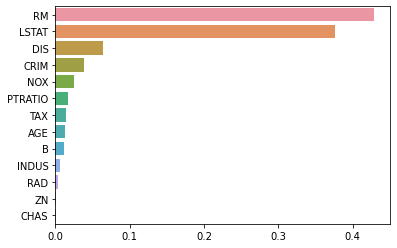

In [11]:
import seaborn as sns
%matplotlib inline

rf_reg.fit(X_data, y_target)
feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

### overfitting 시각화해보기
- dataframe에 sample 메소드를 활용하면 알아서 sampling해줌

(100, 2)


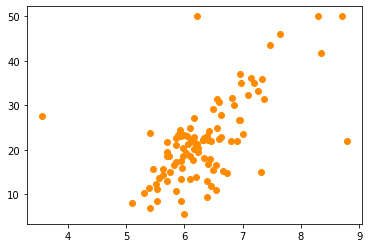

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

df_rm = df[['RM','price']]
df_rm = df_rm.sample(n=100, random_state=11)
print(df_rm.shape)
plt.figure()
plt.scatter(df_rm.RM, df_rm.price, c='darkorange')

In [19]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = RandomForestRegressor(max_depth=2)
rf_reg7 = RandomForestRegressor(max_depth=7)

# 예측을 적용할 임의의 테스트셋을 만들기 위해 4.5~8.5까지 100개의 데이터를 만듦
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

X_data = df_rm['RM'].values.reshape(-1,1)
y_target = df_rm['price'].values.reshape(-1,1)

lr_reg.fit(X_data, y_target)
rf_reg2.fit(X_data, y_target)
rf_reg7.fit(X_data, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

<ipython-input-19-f529a8725317>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg2.fit(X_data, y_target)
<ipython-input-19-f529a8725317>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg7.fit(X_data, y_target)


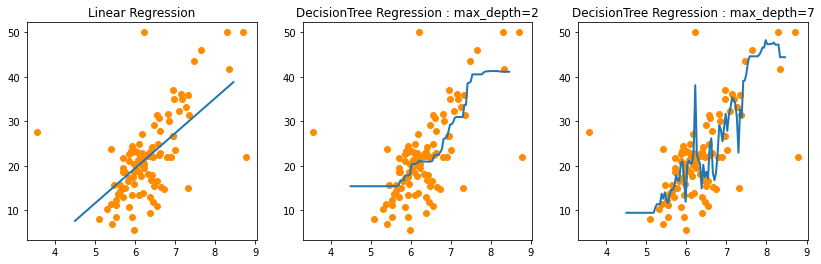

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(df_rm.RM, df_rm.price, c='darkorange')
# X_test에 따른 pred_lr을 선으로 그림
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('DecisionTree Regression : max_depth=2')
ax2.scatter(df_rm.RM, df_rm.price, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:2', linewidth=2)

ax3.set_title('DecisionTree Regression : max_depth=7')
ax3.scatter(df_rm.RM, df_rm.price, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)
